In [83]:
import psycopg2
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Downloads/country_comparison_large_dataset(1).csv")
display(df)

In [ ]:
df.info()

In [ ]:
colunas_para_remover = [
    'Number of International Visitors (in Millions)', 'Tourism Revenue (in Billion USD)', 'Agricultural Land (%)', 'Labor Force Participation Rate (%)', 'CO2 Emissions (Million Metric Tons)', 'Forest Coverage (%)', 'Public Transport Usage (%)', 'Literacy Rate (%)', 'Education Expenditure as % of GDP', 'Internet Penetration (%)'
, 'Smartphone Adoption (%)', 'Energy Consumption (TWh)', 'Renewable Energy Share (%)', 'Number of Airports', 'Road Network Length (in km)', 'Human Development Index (HDI)'
]

df.drop(columns=colunas_para_remover, inplace=True)

display(df)

In [ ]:
colunas_traduzidas = {
    'Country': 'Pais',
    'Year': 'Ano',
    'GDP (in Trillions USD)': 'PIB em trilhoes USD',
    'GDP per Capita (in USD)': 'PIB per capita USD',
    'Inflation Rate (%)': 'Taxa de inflacao (%)',
    'Population (in Millions)': 'Populacao (em Milhoes)',
    'Population Growth Rate (%)': 'Taxa de Crescimento Populacional (%)',
    'Urban Population (%)': 'Populacao Urbana (%)',
    'Life Expectancy (Years)': 'Expectativa de vida',
    'Healthcare Expenditure per Capita (USD)': 'Gasto com saude per Capita',
    'Poverty Rate (%)': 'Taxa de pobreza (%)',
    'Unemployment Rate (%)': 'Taxa de desemprego (%)',
    'Crime Rate (per 100,000)': 'Taxa de criminalidade',
    'Corruption Perception Index': 'Indice de Percepcao Corrupcao',
    'Freedom of Press Index': 'Indice de liberdade de imprensa',
    'Voting Participation Rate (%)': 'Taxa de Participacao na Votacao (%)',
    'Doctor-to-Patient Ratio': 'Proporção de médico para paciente',
    'Military Expenditure (in Billion USD)': 'Gasto militar (em Bilhoes de USD)',
    'Number of Active Military Personnel': 'Número de militares ativos',
    'Gender Equality Index': 'Índice de Igualdade de Gênero'
}

df.rename(columns=colunas_traduzidas, inplace=True)


In [ ]:
df.info()

In [3]:
conn = psycopg2.connect(
    database = "Country",
    host = "localhost",
    user = "postgres",
    password = "1234",
    port = "5432"
)

cursor = conn.cursor()

print(conn.status)

1


In [ ]:
cursor.execute("""
CREATE TABLE Dados_Paises (
    Pais VARCHAR(50),
    Ano INTEGER,
    PIB_em_trilhoes_usd DECIMAL,
    PIB_per_capita_usd DECIMAL,
    Taxa_de_inflacao DECIMAL,
    Populacao_milhoes DECIMAL,
    Taxa_de_Crescimento_Populacional DECIMAL,
    Populacao_Urbana DECIMAL,
    Expectativa_de_vida DECIMAL,
    Gasto_com_saude_per_Capita DECIMAL,
    Proporcao_de_medico_para_paciente DECIMAL,
    Gasto_militar_bilhoes_usd DECIMAL,
    Numero_Militares_Ativos DECIMAL,
    Indice_Igualdade_Genero DECIMAL,
    Taxa_pobreza DECIMAL,
    Taxa_desemprego DECIMAL,
    Taxa_criminalidade DECIMAL,
    Indice_percepcao_corrupcao DECIMAL,
    Indice_liberdade_imprensa DECIMAL,
    Taxa_participacao_votacao DECIMAL
)
""")
conn.commit()

In [ ]:
for _, row in df.iterrows():
    cursor.execute("""
        INSERT INTO Dados_Paises (
            Pais, Ano, PIB_em_trilhoes_usd, PIB_per_capita_usd, Taxa_de_inflacao, 
            Populacao_milhoes, Taxa_de_Crescimento_Populacional, Populacao_Urbana, Expectativa_de_vida, 
            Gasto_com_saude_per_Capita, Proporcao_de_medico_para_paciente, Gasto_militar_bilhoes_usd, 
            Numero_Militares_Ativos, Indice_Igualdade_Genero, Taxa_pobreza, Taxa_desemprego, 
            Taxa_criminalidade, Indice_percepcao_corrupcao, Indice_liberdade_imprensa, Taxa_participacao_votacao
        ) VALUES (
            %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s
        )""", tuple(row))  

conn.commit()

In [ ]:
cursor.execute("SELECT * FROM Dados_Paises WHERE Ano = 2022")
result = cursor.fetchall()

for row in result:
    print(row)

In [5]:
dados = pd.read_sql("SELECT * FROM Dados_Paises", conn)
display(dados)

C:\Users\Roger\AppData\Local\Temp\ipykernel_10668\597351565.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dados = pd.read_sql("SELECT * FROM Dados_Paises", conn)


,pais,ano,pib_em_trilhoes_usd,pib_per_capita_usd,taxa_de_inflacao,populacao_milhoes,taxa_de_crescimento_populacional,populacao_urbana,expectativa_de_vida,gasto_com_saude_per_capita,proporcao_de_medico_para_paciente,gasto_militar_bilhoes_usd,numero_militares_ativos,indice_igualdade_genero,taxa_pobreza,taxa_desemprego,taxa_criminalidade,indice_percepcao_corrupcao,indice_liberdade_imprensa,taxa_participacao_votacao
0,China,2000,13.64,10060.0,2.43,1446.93,0.31,58.56,76.09,459.00,1.86,255.52,2045900.0,0.85,2.04,3.68,102.90,41.75,185.32,72.14
1,India,2000,2.98,2102.1,4.87,1313.76,1.04,34.09,68.78,76.07,0.86,70.01,1475768.0,0.66,22.25,7.31,245.25,40.12,136.36,67.65
2,Russia,2001,1.66,10890.0,3.00,152.10,0.10,71.56,69.99,529.73,3.94,62.50,1030000.0,0.73,11.97,4.58,520.00,28.83,151.65,62.73
3,USA,2002,21.17,67470.0,2.28,343.58,0.57,80.59,81.63,11055.00,2.50,732.73,1436400.0,0.99,10.36,3.83,288.60,71.35,43.42,69.34
4,Canada,2002,1.79,47932.0,1.94,35.56,0.95,77.84,85.18,5082.00,2.75,22.31,68310.0,0.99,9.79,5.45,832.80,70.60,15.33,62.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Russia,2022,1.56,10857.0,3.10,142.25,0.10,77.55,71.87,544.95,4.05,60.28,1026000.0,0.70,13.03,4.60,516.50,29.01,157.05,61.88
140,China,2022,13.92,9540.0,2.29,1398.00,0.29,62.82,75.93,451.80,1.84,269.87,2066400.0,0.84,2.04,3.54,101.70,43.97,174.34,73.94
141,Canada,2023,1.73,44804.0,1.88,35.59,0.93,83.11,79.17,5139.75,2.78,23.05,66015.0,0.98,9.24,5.44,800.80,72.37,15.52,62.28
142,India,2023,2.79,2070.6,4.70,1411.74,1.03,34.05,70.09,76.07,0.93,71.28,1428116.0,0.67,21.94,7.16,240.75,41.36,133.28,66.20


In [7]:
cursor.close()
conn.close()

In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   pais                               144 non-null    object 
 1   ano                                144 non-null    int64  
 2   pib_em_trilhoes_usd                144 non-null    float64
 3   pib_per_capita_usd                 144 non-null    float64
 4   taxa_de_inflacao                   144 non-null    float64
 5   populacao_milhoes                  144 non-null    float64
 6   taxa_de_crescimento_populacional   144 non-null    float64
 7   populacao_urbana                   144 non-null    float64
 8   expectativa_de_vida                144 non-null    float64
 9   gasto_com_saude_per_capita         144 non-null    float64
 10  proporcao_de_medico_para_paciente  144 non-null    float64
 11  gasto_militar_bilhoes_usd          144 non-null    float64

In [109]:
class DataPaises:
    def __init__(self, data_frame):
        self.data = data_frame

    def pegar_dados_de_pais(self, nome_país):
        nome_país = self.data[self.data['pais'] == nome_país]
        return nome_país

    def pegar_dados_de_ano(self, ano):
        data_ano = self.data[self.data['ano'] == ano]
        return data_ano

    def pegar_indicador_nomepaís_ano(self, nome_país, ano, indicador):
        resultado = self.data[(self.data['pais'] == nome_país) & (self.data['ano'] == ano)]
        if not resultado.empty:
            return resultado[indicador].values[0]
        else:
            print(f"No data found for {nome_país} in {ano}.")
            return None

In [111]:
dados_pais = DataPaises(dados)

In [123]:
#Pega todos os dados de um determinado
dados_2005 = dados_pais.pegar_dados_de_ano(2005)
display(dados_2005)

,pais,ano,pib_em_trilhoes_usd,pib_per_capita_usd,taxa_de_inflacao,populacao_milhoes,taxa_de_crescimento_populacional,populacao_urbana,expectativa_de_vida,gasto_com_saude_per_capita,proporcao_de_medico_para_paciente,gasto_militar_bilhoes_usd,numero_militares_ativos,indice_igualdade_genero,taxa_pobreza,taxa_desemprego,taxa_criminalidade,indice_percepcao_corrupcao,indice_liberdade_imprensa,taxa_participacao_votacao
81,USA,2005,21.34,66235.0,2.32,329.01,0.62,82.17,82.18,11198.00,2.49,761.28,1412600.0,0.99,10.53,3.63,288.00,71.76,44.10,69.55
82,Russia,2005,1.70,10868.0,3.17,147.47,0.10,71.04,73.25,504.52,4.11,60.16,1029000.0,0.75,12.03,4.43,507.50,29.46,147.60,63.90
83,Canada,2005,1.81,45540.0,1.96,37.37,0.89,80.19,85.67,5423.25,2.95,22.02,67635.0,0.96,9.17,5.49,836.00,75.04,15.30,57.78
84,China,2005,14.67,10200.0,2.33,1350.47,0.29,57.06,78.92,463.95,1.72,247.95,1980300.0,0.79,2.08,3.57,100.80,42.71,180.72,73.15
85,India,2005,2.90,2163.0,4.62,1317.90,1.05,33.70,67.94,73.44,0.94,71.64,1425228.0,0.69,22.78,7.38,259.25,39.40,135.80,63.16
86,Australia,2005,1.29,54537.0,1.48,25.62,1.33,81.87,80.31,4981.60,3.46,27.34,57884.0,0.93,9.61,5.11,930.60,77.92,26.07,92.09


In [101]:
#Pega o indicator(o ultimo parametro e mostra em relacao ao pais e ao ano)
dados_india12 = dados_pais.pegar_indicador_nomepaís_ano("India", 2012, "pib_em_trilhoes_usd")
display(dados_india12)

2.98

In [97]:
#pegas os dados de certo pais
dados_usa = dados_pais.pegar_dados_de_pais("USA")
display(dados_usa)

,pais,ano,pib_em_trilhoes_usd,pib_per_capita_usd,taxa_de_inflacao,populacao_milhoes,taxa_de_crescimento_populacional,populacao_urbana,expectativa_de_vida,gasto_com_saude_per_capita,proporcao_de_medico_para_paciente,gasto_militar_bilhoes_usd,numero_militares_ativos,indice_igualdade_genero,taxa_pobreza,taxa_desemprego,taxa_criminalidade,indice_percepcao_corrupcao,indice_liberdade_imprensa,taxa_participacao_votacao
3,USA,2002,21.17,67470.0,2.28,343.58,0.57,80.59,81.63,11055.0,2.50,732.73,1436400.0,0.99,10.36,3.83,288.6,71.35,43.42,69.34
17,USA,2010,21.86,64220.0,2.30,338.94,0.61,78.85,82.66,10835.0,2.51,707.11,1387400.0,1.01,10.03,3.65,294.9,72.31,46.30,64.25
26,USA,2014,21.49,68120.0,2.21,319.08,0.61,82.58,76.57,11275.0,2.69,752.50,1344000.0,0.97,10.44,3.72,313.2,71.55,47.16,69.75
28,USA,2015,20.72,64870.0,2.34,321.40,0.60,82.42,79.18,10560.0,2.49,702.72,1437800.0,1.03,10.70,3.59,293.1,72.24,43.47,67.94
43,USA,2019,21.52,63375.0,2.28,318.09,0.61,84.66,78.55,11033.0,2.58,734.93,1419600.0,1.03,10.90,3.86,306.6,71.28,44.28,70.28
50,USA,2021,21.73,65390.0,2.23,323.72,0.62,79.76,82.11,11440.0,2.70,710.77,1464400.0,0.94,10.90,3.76,307.2,70.17,43.52,69.08
53,USA,2022,20.38,66105.0,2.27,325.04,0.62,82.58,76.73,10824.0,2.72,721.75,1400000.0,0.99,10.95,3.80,306.3,69.83,46.66,69.48
57,USA,2023,21.17,63245.0,2.20,346.56,0.59,80.01,80.68,10890.0,2.48,754.69,1342600.0,1.00,10.17,3.55,287.7,65.62,45.41,68.21
60,USA,2000,20.87,65455.0,2.28,330.34,0.58,83.42,78.39,11209.0,2.60,724.68,1464400.0,0.94,10.98,3.55,287.4,67.41,45.27,68.81
64,USA,2001,22.01,66365.0,2.25,342.58,0.62,83.58,77.52,10835.0,2.70,757.62,1386000.0,0.98,10.50,3.64,306.9,69.28,45.05,63.65


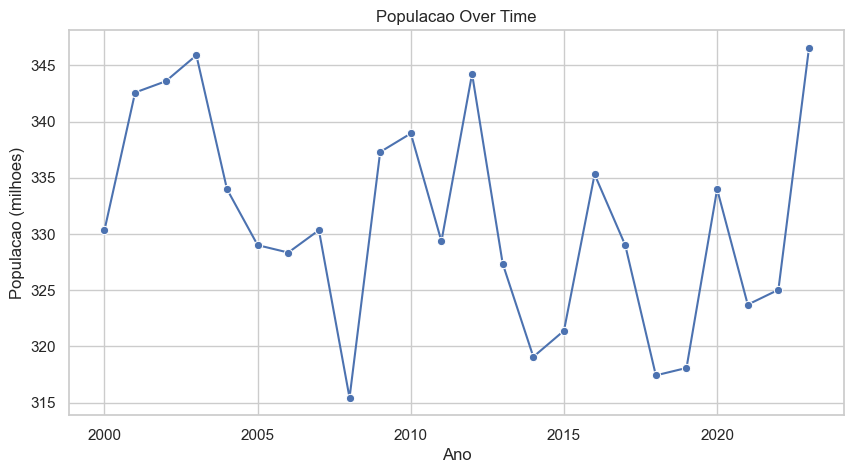

In [81]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.lineplot(data=dados_usa, x='ano', y='populacao_milhoes', marker="o", color="b")
plt.title("Populacao Over Time")
plt.xlabel("Ano")
plt.ylabel("Populacao (milhoes)")
plt.show()